#Gradient Symbolic Computation  

##Paul Smolensky and Matt Goldrick
> ### <em>with the essential help of</em>  

##Nicholas Becker and Pyeong Whan Cho
###LSA 2015 Summer Linguistic Institute, University of Chicago

<font; color="red">
# Class 4B (Thursday, July 16, 2015) 
# Weak elements have strong consequences when the constraints they trigger are unopposed 
##Movement/multiattachment as blended roles: Simple *wh*-questions

In [1]:
%matplotlib inline
%run ../../code/gsc

$%This was created by Pyeong Whan Cho as roughly the first half of 'GscNet-Tutorial-04-Wh-question', and edited by Paul Smolensky
$In this notebook, created by Pyeong Whan Cho and edited by Paul Smolensky, we show how to create a GSC network with multiple GSC subnetworks (or layers) using the wh-question example explained in the Keynote presentations of Class 4. 

First, let us create three GSC networks that process logical forms, syntactic structures, and phonological forms, respectively. Each subnetwork can have a unique parameter setting. For example, you can set the time step constant, the attribute $\texttt{dt}$ of each network, to a unique value such that the state change is faster in a network than in other networks. In this tutorial, we will use the same parameter setting except for the weights and biases of each network. Let us set several parameters which will be shared by all three networks.

In the GSC network, the total harmony $H$ is determined as follows:

$$H(s(t)) = H_0(s(t)) + H_1(s(t)) + q(t) \cdot H_{\cal Q}(s(t))$$

where $s(t)$ is the activation state at time $t$ and $q(t)$ is the parameter $q$'s value at time $t$. The Quantization Harmony function $H_{\cal Q}$ will sometimes be abbreviated to simply $Q$. 

Until Class 6, we will not consider the dynamics of GSC networks, so $q(t)$ will be a constant for now (although the program wants specification of dynamical properties, which we will specify here but ignore until Class 6).

In [2]:
# Set the parameters for q update. Needed by the program, ignored by us for now.
q_rate = 5.0
q_fun = 'log'        # q update function. q(t+1) = q_rate * log(t + 1). At the beginning, q_time is set to 0. 
# q_rate = 0.01
# q_fun = 'plinear'
q_max = 120   # 200  # used only when q_fun is set to 'plinear'
omega = 4.0   # 2.0 (plinear)
beta_LF = beta_SS = beta_PF = 11.0  # bowl strength of each of three subnetworks

###Create the LF subnetwork

By creating an object which is an instance of the class <font; color="orange">$\texttt{GscNet}$<font; color="black">, we first create a GSC subnetwork -- or 'layer' -- that processes logical forms. In the below example, we create the objects of classes $\texttt{WeightTP}$ and $\texttt{BiasTP}$ that contain a weight matrix and a bias vector, respectively. (Actually, we could add the weights after creating the GscNet object; this is illustrated below in creating the PF layer.) 

<font; color='red'>
####Specifying competitors for quantization

In previous models discussed in the course, competition imposed by quantization didn't need to be specified explicitly because it took its default form: competition among symbols for filling each single role. In the current model the competition takes a different form: roles compete for housing each single symbol. So this competition needs to be specified explicitly for the software through the ${\texttt{quant_list}}$ argument. This argument should be a list object of multiple list objects; each inner list is a set of labels of filler/role binding that compete under quantization, each such competition being independent of the others. For example, in the LF subnet of the wh-question model that we now construct,  $\texttt{quant_list}$ is set to $\texttt{[['W/a', 'W/p'], ['K/a', 'K/p']]}$. Quantization will be applied to a pair of competing bindings (labelled $\texttt{'W/a'}$ and $\texttt{'W/p'}$) and separately to another pair of competing bindings ($\texttt{'K/a'}$ and $\texttt{'K/p'}$). When the $\texttt{quant_list}$ argument is omitted, by default, the program applies quantization dynamics to each role separately.

In [3]:
# Create a GscNet to process logical forms.
layer_name = 'LF'           # LogicalForm
filler_names_LF = ['W', 'K']   # words W(hat) and K(ay)
role_names_LF = ['a', 'p']     # a(gent) vs. p(atient)
binding_names_LF = bind(filler_names_LF, role_names_LF)  # bind all fillers with all roles
W_LF = WeightTP(binding_names_LF)        # Create a zero weight matrix.
W_LF.set_weight('W/a', 'K/a', -1.0)   # competition through *weights* (not Q) between fillers of role a
W_LF.set_weight('W/p', 'K/p', -1.0)   # ditto for role p
W_LF.show()                 # prints the weight matrix for the LF layer
b_LF = BiasTP(binding_names_LF)
b_LF.show()                 # prints the bias vector for the LF layer
quant_list_LF = [['W/a', 'W/p'], ['K/a', 'K/p']]   # Specify the groups of bindings in each of which quantization will be applied.
## create the subnetwork/layer object:
net_LF = GscNet(role_names=role_names_LF, filler_names=filler_names_LF, 
             WGC=getattr(W_LF, 'WGC'), bGC=getattr(b_LF, 'bGC'), extC=np.zeros(len(binding_names_LF)), 
             T_init=1, T_decay_rate=0.001, beta=beta_LF, q_rate=q_rate, q_fun=q_fun, q_max=q_max, quant_list=quant_list_LF)

     W/a  K/a  W/p  K/p
W/a    0   -1    0    0
K/a   -1    0    0    0
W/p    0    0    0   -1
K/p    0    0   -1    0
     bias
W/a     0
K/a     0
W/p     0
K/p     0


####Create the SS layer

Create another GSC subnetwork, the S(yntactic)S(tructure) layer.

In [4]:
# Create a GscNet to process syntactic structures
layer_name = 'SS'
filler_names_SS = ['W', 'K']          # still W(hat), K(ay)
role_names_SS = ["h", "m", "l"]       # scope level of roles: h(igh), m(iddle), l(ow)
binding_names_SS = bind(filler_names_SS, role_names_SS)
W_SS = WeightTP(binding_names_SS)
W_SS.set_weight('W/h', 'K/h', -1.0) # as in LF layer, competition thru *wts* within roles
W_SS.set_weight('W/m', 'K/m', -1.0)
W_SS.set_weight('W/l', 'K/l', -1.0)
W_SS.show()
b_SS = BiasTP(binding_names_SS)
b_SS.set_bias('W/h', omega)      # omega is the strength of the 'Front wh-phrases' constraint
b_SS.show()
quant_list_SS = [['W/h', 'W/m', 'W/l'], ['K/h', 'K/m', 'K/l']] # competition in Q among roles for each filler
## create the subnetwork/layer object:
net_SS = GscNet(role_names=role_names_SS, filler_names=filler_names_SS, 
             WGC=getattr(W_SS, 'WGC'), bGC=getattr(b_SS, 'bGC'), extC=np.zeros(len(binding_names_SS)), 
             T_init=1, T_decay_rate=0.001, beta=beta_SS, q_rate=q_rate, q_fun=q_fun, q_max=q_max, quant_list=quant_list_SS)

     W/h  K/h  W/m  K/m  W/l  K/l
W/h    0   -1    0    0    0    0
K/h   -1    0    0    0    0    0
W/m    0    0    0   -1    0    0
K/m    0    0   -1    0    0    0
W/l    0    0    0    0    0   -1
K/l    0    0    0    0   -1    0
     bias
W/h     4
K/h     0
W/m     0
K/m     0
W/l     0
K/l     0


####Create the PF layer

Finally, we create a GSC network that processes phonological forms. Here we construct the weight matrix and the bias vector after creating a GSC network. This may be an easier way to specify weights and biases manually. When WGC, bGC, and extC are not provided, the program creats a zero weight matrix, a zero bias vector, and a zero external input vector.

In [5]:
# Create a GscNet to process phonological forms
layer_name ='PF'
filler_names_PF = ['W', 'K']
role_names_PF = ['f', 's', 'b']        #linear positions: f(ront), s(ubject = pre-V), (o)b(ject = post-V))
quant_list_PF = [['W/f', 'W/s', 'W/b'], ['K/f', 'K/s', 'K/b']]
net_PF = GscNet(role_names=role_names_PF, filler_names=filler_names_PF, 
             T_init=1, T_decay_rate=0.001, beta=beta_PF, q_rate=q_rate, q_fun=q_fun, q_max=q_max, quant_list=quant_list_PF)
net_PF.set_weight('W/f', 'K/f', -1.0)
net_PF.set_weight('W/s', 'K/s', -1.0)
net_PF.set_weight('W/b', 'K/b', -1.0)
net_PF.read_weight()
net_PF.read_bias()

     W/f  K/f  W/s  K/s  W/b  K/b
W/f    0   -1    0    0    0    0
K/f   -1    0    0    0    0    0
W/s    0    0    0   -1    0    0
K/s    0    0   -1    0    0    0
W/b    0    0    0    0    0   -1
K/b    0    0    0    0   -1    0
     bias
W/f     0
K/f     0
W/s     0
K/s     0
W/b     0
K/b     0


####Create the complete network

Now we are ready to create a big network that has three networks as its components. This type of network (a network of multiple networks) needs the <font; color="green">$\texttt{GscNet0}$<font; color="black"> class. Note that the binding names of the bigger network, listed below, are simply concatenations of the binding names in each subnetwork and the subnetwork names joined by a colon, e.g., $\texttt{'W/a:LF'}$.

In [6]:
# Combine three subnets
net_list = [net_LF, net_SS, net_PF]
net_names = ['LF', 'SS', 'PF']
net = GscNet0(net_list, net_names)
net.binding_names   # print binding names.

['W/a:LF',
 'K/a:LF',
 'W/p:LF',
 'K/p:LF',
 'W/h:SS',
 'K/h:SS',
 'W/m:SS',
 'K/m:SS',
 'W/l:SS',
 'K/l:SS',
 'W/f:PF',
 'K/f:PF',
 'W/s:PF',
 'K/s:PF',
 'W/b:PF',
 'K/b:PF']

The newly created network, $\texttt{net}$, is just a collection of three networks and each subnetwork does not interact with other networks; the program assigns 0 weight to all between-network connections. Users need to manually specify the between-network connections in the following way.

In [8]:
# Construct weights between subnets.
# For now, this part should be done manually.
net.set_weight("W/a:LF", "W/m:SS", 1)
net.set_weight("W/p:LF", "W/l:SS", 1)
net.set_weight("K/a:LF", "K/m:SS", 1)
net.set_weight("K/p:LF", "K/l:SS", 1)
net.set_weight("W/h:SS", "W/f:PF", 1)
net.set_weight("W/m:SS", "W/s:PF", 1)
net.set_weight("W/l:SS", "W/b:PF", 1)
net.set_weight("K/h:SS", "K/f:PF", 1)
net.set_weight("K/m:SS", "K/s:PF", 1)
net.set_weight("K/l:SS", "K/b:PF", 1)
net.read_weight()

        W/a:LF  K/a:LF  W/p:LF  K/p:LF  W/h:SS  K/h:SS  W/m:SS  K/m:SS  \
W/a:LF     -11      -1       0       0       0       0       1       0   
K/a:LF      -1     -11       0       0       0       0       0       1   
W/p:LF       0       0     -11      -1       0       0       0       0   
K/p:LF       0       0      -1     -11       0       0       0       0   
W/h:SS       0       0       0       0     -11      -1       0       0   
K/h:SS       0       0       0       0      -1     -11       0       0   
W/m:SS       1       0       0       0       0       0     -11      -1   
K/m:SS       0       1       0       0       0       0      -1     -11   
W/l:SS       0       0       1       0       0       0       0       0   
K/l:SS       0       0       0       1       0       0       0       0   
W/f:PF       0       0       0       0       1       0       0       0   
K/f:PF       0       0       0       0       0       1       0       0   
W/s:PF       0       0       0       0

###Visualizing the network connections

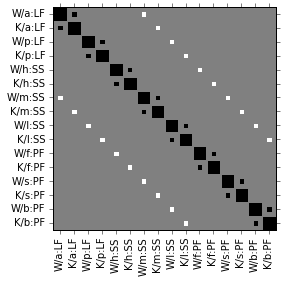

In [9]:
net.hinton()  # By default, the hinton() method draws a Hinton diagram with WGC
              #  (the weights specified by grammar assuming local representation)

You can access a subnetwork as follows. 

The Hinton diagram of the LF subnetwork.


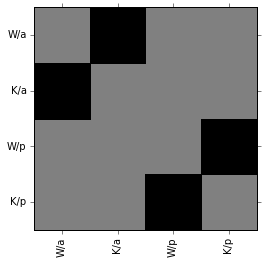

The activation state (pattern coordinate) of the LF subnetwork:
   a  p
W  0  0
K  0  0


In [10]:
print('The Hinton diagram of the %s subnetwork.' % net.group_names[0])
net.groups[0].hinton()
print('The activation state (pattern coordinate) of the %s subnetwork:' % net.group_names[0])
net.groups[0].read_state()

In [11]:
net.groups[1].read_bias()

     bias
W/h     4
K/h     0
W/m     0
K/m     0
W/l     0
K/l     0


##Applying the network to an example

In the following simulation, we clamp a subnetwork to a certain state and investigate the state changes in other subnetworks. First, let us clamp the phonolocial form processing network to a state at which 'W(hat)' is given a patient role and word 'K(ay)' is given an agent role. We fix the activation state of 'W/p:LF', 'K/a:LF' to 1 and the activation state of 'W/a:LF', 'K/p:LF' to 0 by using the $\texttt{clamp}$ method.

*to appear here: use of optim.minimize to find optimal values of subnetwork representations when other subnetwork representations are clamped to relevant values -- as in the Keynote presentations*